In [30]:
import pandas as pd
import numpy as np

In [32]:
# Load the dataset
df1 = pd.read_csv('English_Abstractive.csv')

from sklearn.model_selection import train_test_split

# Separating features and labels
x = df1.iloc[:, :-1].values  # Feature vectors
y = df1['Judgement Status'].values  # Labels

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Testing the classifier
accuracy = knn.score(x_test, y_test)
print(f"Accuracy of kNN (k=3): {accuracy * 100:.2f}%")

# Predicting the class labels for the test set
y_pred = knn.predict(x_test)

# Displaying the first 10 predictions alongside actual labels
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

Accuracy of kNN (k=3): 22.22%
Predicted: 0, Actual: 1
Predicted: 3, Actual: 3
Predicted: 3, Actual: 2
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 3, Actual: 0
Predicted: 3, Actual: 1
Predicted: 0, Actual: 2


In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision, Recall, and F1-Score for multiclass classification
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_test:.2f}")

# Predicting on training data
y_train_pred = knn.predict(x_train)

# Confusion Matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print(f"Training Confusion Matrix:\n{conf_matrix_train}")

# Precision, Recall, and F1-Score for training data
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f"Training Precision: {precision_train:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Training F1-Score: {f1_train:.2f}")

# Observations: Comparing the metrics to identify underfit, regularfit, or overfit.
if f1_train > f1_test:
    print("The model may be overfitting.")
elif f1_train < f1_test:
    print("The model may be underfitting.")
else:
    print("The model seems to be well-fit.")


Confusion Matrix:
[[14 24  2 12]
 [22 18  4 11]
 [10 15  2  8]
 [12 16  4  6]]
Precision: 0.20
Recall: 0.20
F1-Score: 0.20
Training Confusion Matrix:
[[46 27  6 12]
 [33 73  2 13]
 [37 33 27 13]
 [19 45  5 29]]
Training Precision: 0.46
Training Recall: 0.41
Training F1-Score: 0.40
The model may be overfitting.


In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Assuming y_true and y_pred are your true and predicted values for regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MSE: 2.4944444444444445
RMSE: 1.5793810320642845
MAPE: 1601279867509509.8
R2 Score: -1.044057765750272


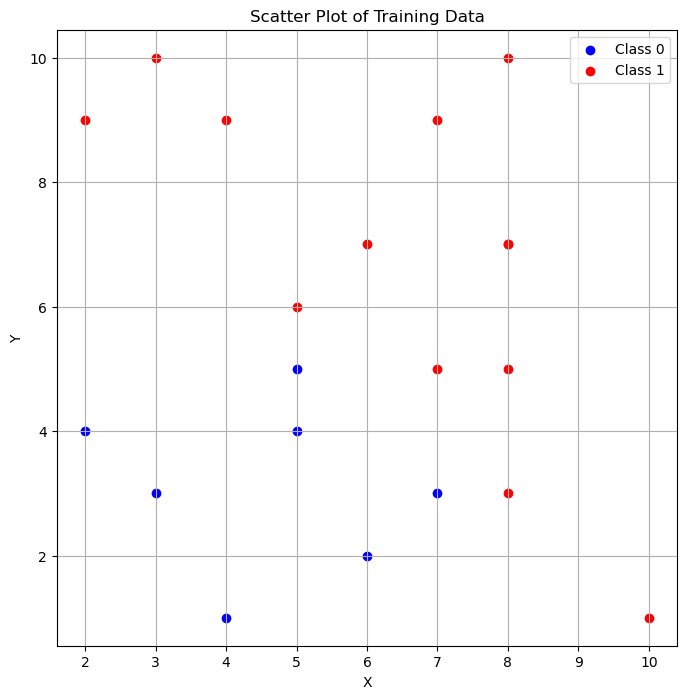

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate 20 random data points for X and Y
np.random.seed(42)
X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)

# Assign classes based on the value of X and Y
classes = np.where(X + Y > 10, 1, 0)

# Plotting the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid()
plt.show()


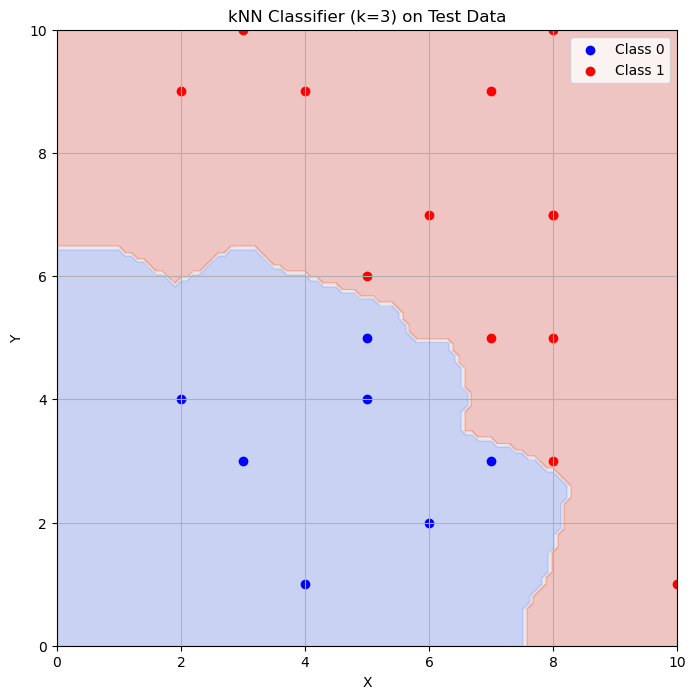

In [54]:
# Generate test data points
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.c_[test_X.ravel(), test_Y.ravel()]

# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.c_[X, Y], classes)

# Predict the class for each test data point
test_pred = knn.predict(test_data)
test_pred = test_pred.reshape(test_X.shape)

# Plot the decision boundary and the test points
plt.figure(figsize=(8, 8))
plt.contourf(test_X, test_Y, test_pred, alpha=0.3, cmap='coolwarm')
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classifier (k=3) on Test Data')
plt.legend()
plt.grid()
plt.show()


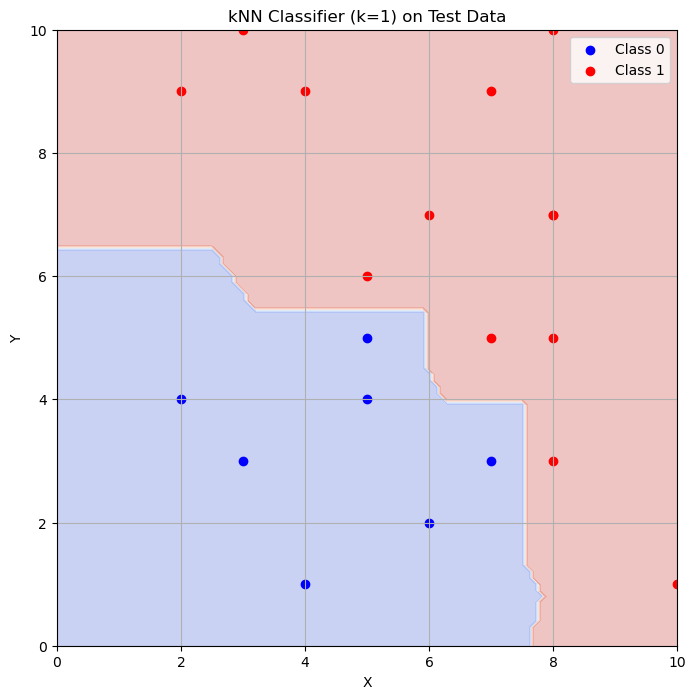

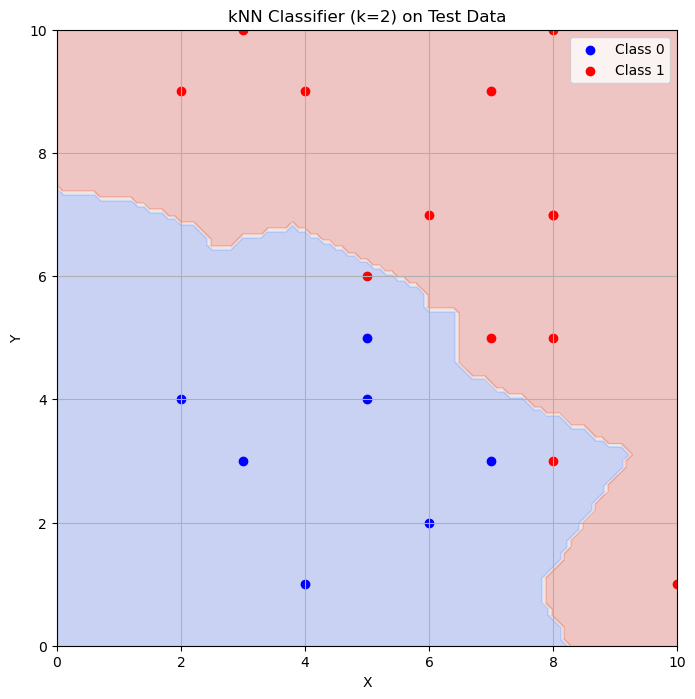

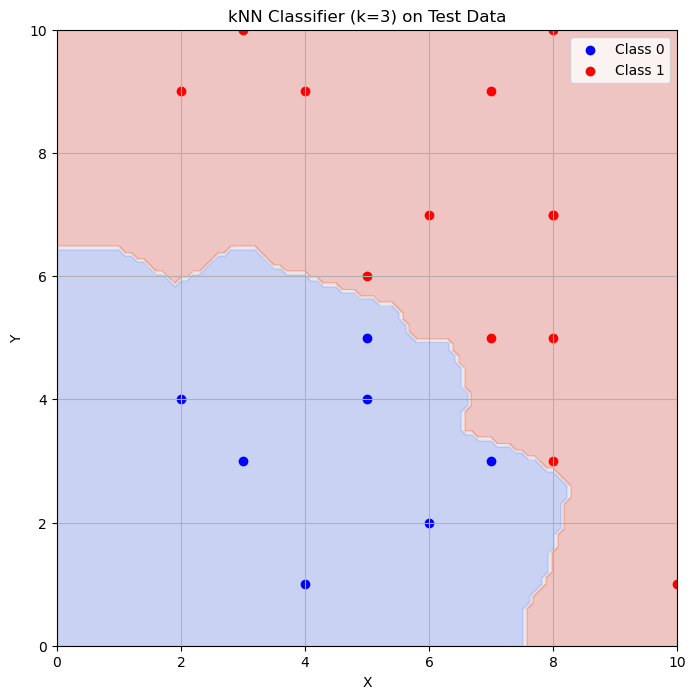

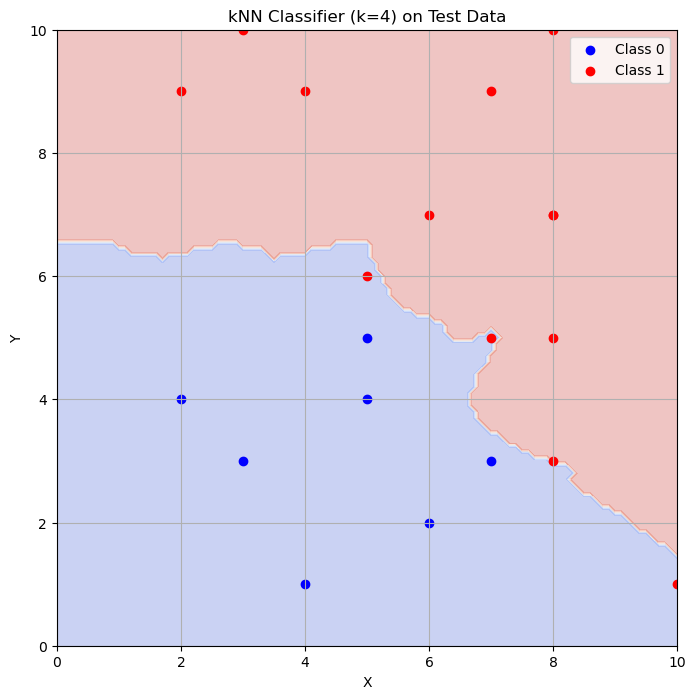

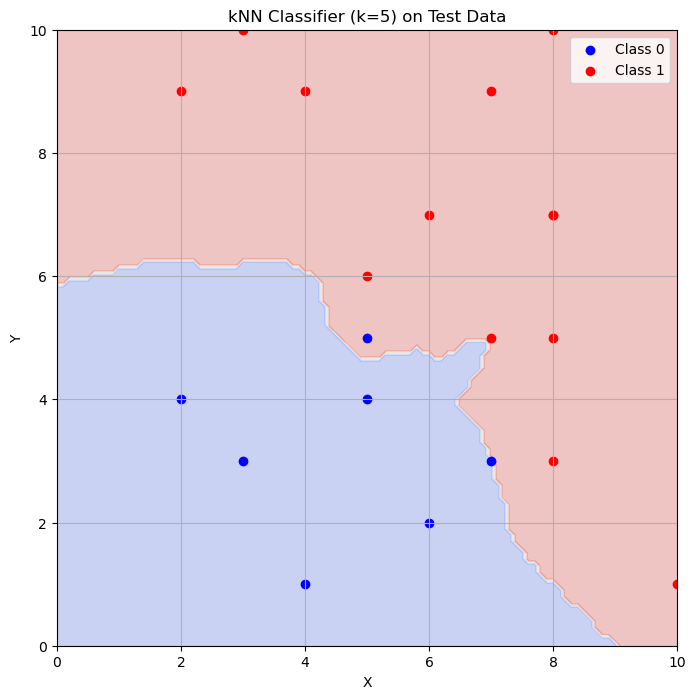

In [56]:
# Repeat the classification and plotting for k=1 to 5
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.c_[X, Y], classes)
    test_pred = knn.predict(test_data).reshape(test_X.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(test_X, test_Y, test_pred, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classifier (k={k}) on Test Data')
    plt.legend()
    plt.grid()
    plt.show()


In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'k'
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initialize the GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameter 'k'
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value found: {best_k}")


Best k value found: 20
